# Project Description:

#The Goal of this project is to analyze song lyrics and determine the sentiment analysis
#of the song. In addition, the model should be able to recommend a list of songs based on 
#a given song and artist name. 

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 200)

# Load data

In [4]:
df_songlist = pd.read_csv("lyrics.csv")
#let's see how many rows and columns we have
df_songlist.shape
df_songlist.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


# Create functions to clean and process data

In [5]:
#This function expects a raw string. The purpose of this function is to take the string
#text and remove double dashes, punctuactions and special characters.
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub(r'_','',text)
    text = ' '.join(text.split())
    return text

In [6]:
#This function expects a raw string. The purpose of this function is to take the string
#text and remove double dashes, punctuactions and special characters.
def text_cleaner_features(text):
    text = re.sub(r'--',' ',text)
    text = re.sub(r'_','',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = re.sub('[^a-zA-z\s]', "", text)
    text = ' '.join(text.split())
    return text

In [7]:
#define a function to lemmatize the list
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

#create a function to lemmatize the text in the combine list
def lemmatizestring(text):

    lmtzr = WordNetLemmatizer()
    #return(" ".join([lmtzr.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(text)]))
    
    return(" ".join([lmtzr.lemmatize(word, pos="v") for word in word_tokenize(text)]))

In [8]:
#Let's see how many songs have NAN for the lyrics
#shows only the columns with missing values
missing_val_count_by_column = (df_songlist.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

song          2
lyrics    95680
dtype: int64


In [9]:
# make copy to avoid changing original data (when performing data cleaning)
#then drop rows that have NAN for the columns identified above
df_new_songlist = df_songlist.copy()
df_new_songlist = df_new_songlist.dropna(axis=0,subset=['song', 'lyrics'])

In [10]:
#verify we don't have any more missing values
missing_val_count_by_column = (df_new_songlist.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [11]:
#verify the shape of new dataframe is not the same as the old dataframe, it should be less
print(df_new_songlist.shape)
#verify the new dataframe contains the same information as the old one
df_new_songlist.head()

(266556, 6)


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [14]:
#process and clean the lyrics column 
# Create a list to store the data
get_lyrics = []
for row in df_new_songlist['lyrics']:
    clean_lyrics = text_cleaner(row) #for each row process and clean the text
    get_lyrics.append(clean_lyrics) #store the clean text in a list
# Create a column from the list
df_new_songlist['clean_lyrics'] = get_lyrics

In [15]:
#lemmatize (reduce words to their root words) the clean lyrics column
#using the NLTK lemmatize function takes over 20 minutes to run so it if very slow to use. 
from time import time
start_time = time()
df_new_songlist['lemmatized'] = df_new_songlist['clean_lyrics'].map(lemmatizestring)
print(time() - start_time)

854.2498879432678


In [16]:
#create a new column where the punctunactions have been removed before including them in my features.
#vader sentiment analysis needs the punctuations to provide better scoring wheres as my feature vectorizer
#dosn't need them
#process and clean the lyrics column 
# Create a list to store the data
get_lyrics_features = []
for row in df_new_songlist['lyrics']:
    clean_lyrics_features = text_cleaner_features(row) #for each row process and clean the text
    get_lyrics_features.append(clean_lyrics_features) #store the clean text in a list
# Create a column from the list
df_new_songlist['lemmatized_features'] = get_lyrics_features

In [17]:
#verify the new dataframe contains the same information as the old one
df_new_songlist.head()

,index,song,year,artist,genre,lyrics,clean_lyrics,lemmatized,lemmatized_features
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...","Oh baby, how you doing? You know I'm gonna cut...","Oh baby , how you do ? You know I 'm gon na cu...",Oh baby how you doing You know Im gonna cut ri...
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...","playin' everything so easy, it's like you seem...","playin ' everything so easy , it 's like you s...",playin everything so easy its like you seem so...
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,If you search For tenderness It isn't hard to ...,If you search For tenderness It be n't hard to...,If you search For tenderness It isnt hard to f...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...","Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...","Oh oh oh I , oh oh oh I [ Verse 1 : ] If I wri...",Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...","Party the people, the people the party it's po...","Party the people , the people the party it 's ...",Party the people the people the party its popp...


In [18]:
#filtered rows from the dataframe that contain NONE and some variation of instrumental
df_new_songlist = df_new_songlist.loc[~df_new_songlist['lyrics'].isin(['Instrumental','[Instrumental]','[instrumental]','INSTRUMENTAL','instrumental','(instrumental)','(Instrumental)','- instrumental -','NONE'])]
df_new_songlist.head()

,index,song,year,artist,genre,lyrics,clean_lyrics,lemmatized,lemmatized_features
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...","Oh baby, how you doing? You know I'm gonna cut...","Oh baby , how you do ? You know I 'm gon na cu...",Oh baby how you doing You know Im gonna cut ri...
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...","playin' everything so easy, it's like you seem...","playin ' everything so easy , it 's like you s...",playin everything so easy its like you seem so...
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,If you search For tenderness It isn't hard to ...,If you search For tenderness It be n't hard to...,If you search For tenderness It isnt hard to f...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...","Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...","Oh oh oh I , oh oh oh I [ Verse 1 : ] If I wri...",Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...","Party the people, the people the party it's po...","Party the people , the people the party it 's ...",Party the people the people the party its popp...


# Sentiment analysis

In [19]:
#Sentiment analysis is simply the process of working out (statistically) whether a piece 
#of text is positive, negative or neutral. The majority of sentiment analysis approaches 
#take one of two forms: polarity-based, where pieces of texts are classified as either 
#positive or negative, or valence-based, where the intensity of the sentiment is taken 
#into account.

#VADER belongs to a type of sentiment analysis that is based on lexicons of 
#sentiment-related words. In this approach, each of the words in the lexicon 
#is rated as to whether it is positive or negative, and in many cases, how positive or 
#negative. 

#As you might have guessed, when VADER analyses a piece of text it checks to see if 
#any of the words in the text are present in the lexicon.

#VADER produces four sentiment metrics from these word ratings, which you can see below. 
#The first three, positive, neutral and negative, represent the proportion of the text 
#that falls into those categories.

#The final metric, the compound score, is the sum of all of the lexicon ratings 
#(1.9 and 1.8 in this case) which have been standardised to range between -1 and 1.

In [20]:
from time import time
start_time = time()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
df_new_songlist['sentiment score'] = df_new_songlist.lemmatized.apply(lambda x: sia.polarity_scores(x))
df_new_songlist.head()

print(time() - start_time)

2643.2918841838837


In [21]:
#transpose the sentiment scores from a dictionary to a column
df_new_songlist = df_new_songlist.join(pd.DataFrame(df_new_songlist["sentiment score"].to_dict()).T)
df_new_songlist.head()

,index,song,year,artist,genre,lyrics,clean_lyrics,lemmatized,lemmatized_features,sentiment score,compound,neg,neu,pos
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...","Oh baby, how you doing? You know I'm gonna cut...","Oh baby , how you do ? You know I 'm gon na cu...",Oh baby how you doing You know Im gonna cut ri...,"{'neg': 0.077, 'neu': 0.7, 'pos': 0.223, 'comp...",0.9978,0.077,0.700,0.223
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...","playin' everything so easy, it's like you seem...","playin ' everything so easy , it 's like you s...",playin everything so easy its like you seem so...,"{'neg': 0.075, 'neu': 0.783, 'pos': 0.142, 'co...",0.9561,0.075,0.783,0.142
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,If you search For tenderness It isn't hard to ...,If you search For tenderness It be n't hard to...,If you search For tenderness It isnt hard to f...,"{'neg': 0.09, 'neu': 0.685, 'pos': 0.225, 'com...",0.9819,0.090,0.685,0.225
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...","Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...","Oh oh oh I , oh oh oh I [ Verse 1 : ] If I wri...",Oh oh oh I oh oh oh I If I wrote a book about ...,"{'neg': 0.017, 'neu': 0.728, 'pos': 0.255, 'co...",0.9993,0.017,0.728,0.255
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...","Party the people, the people the party it's po...","Party the people , the people the party it 's ...",Party the people the people the party its popp...,"{'neg': 0.038, 'neu': 0.888, 'pos': 0.074, 'co...",0.8659,0.038,0.888,0.074


In [ ]:
#About the Scoring

#The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according 
#to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 
#This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. 
#Calling it a 'normalized, weighted composite score' is accurate.

#It is also useful for researchers who would like to set standardized thresholds for classifying sentences as 
#either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05
#The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should 
#all add up to be 1... or close to it with float operation). These are the most useful metrics if you want 
#multidimensional measures of sentiment for a given sentence.

In [22]:
#Create two new columns that will hold the sentiment overall label (Positive, Neutral, Negative) and create
#a label code for each of the labels to utilize for further analysis.
label_code = []
label = []
for score in df_new_songlist['compound']:
    if score >= 0:
        lbcd = 1
        lb = 'Positive'
        label_code.append(lbcd)
        label.append(lb)
    #Removing classification of neutral scoring as it is creating a class imbalance
    #elif score > -0.05 and score < 0.05:
     #   lbcd = 0
      #  lb = 'Neutral'
       # label_code.append(lbcd)
        #label.append(lb)
    elif score < 0:
        lbcd = -1
        lb = 'Negative'
        label_code.append(lbcd)
        label.append(lb)
df_new_songlist['sentiment_label'] = label
df_new_songlist['sentiment_label_code'] = label_code

In [23]:
#apply the ilter criteria then create a new column that contains the 
#the total count of words.

df_new_songlist['words'] = df_new_songlist['lemmatized'].apply(lambda x: len(str(x).split()))
df_new_songlist.head()

,index,song,year,artist,genre,lyrics,clean_lyrics,lemmatized,lemmatized_features,sentiment score,compound,neg,neu,pos,sentiment_label,sentiment_label_code,words
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...","Oh baby, how you doing? You know I'm gonna cut...","Oh baby , how you do ? You know I 'm gon na cu...",Oh baby how you doing You know Im gonna cut ri...,"{'neg': 0.077, 'neu': 0.7, 'pos': 0.223, 'comp...",0.9978,0.077,0.700,0.223,Positive,1,512
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...","playin' everything so easy, it's like you seem...","playin ' everything so easy , it 's like you s...",playin everything so easy its like you seem so...,"{'neg': 0.075, 'neu': 0.783, 'pos': 0.142, 'co...",0.9561,0.075,0.783,0.142,Positive,1,306
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,If you search For tenderness It isn't hard to ...,If you search For tenderness It be n't hard to...,If you search For tenderness It isnt hard to f...,"{'neg': 0.09, 'neu': 0.685, 'pos': 0.225, 'com...",0.9819,0.090,0.685,0.225,Positive,1,184
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...","Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...","Oh oh oh I , oh oh oh I [ Verse 1 : ] If I wri...",Oh oh oh I oh oh oh I If I wrote a book about ...,"{'neg': 0.017, 'neu': 0.728, 'pos': 0.255, 'co...",0.9993,0.017,0.728,0.255,Positive,1,600
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...","Party the people, the people the party it's po...","Party the people , the people the party it 's ...",Party the people the people the party its popp...,"{'neg': 0.038, 'neu': 0.888, 'pos': 0.074, 'co...",0.8659,0.038,0.888,0.074,Positive,1,394


# remove outliers and clean invalid data

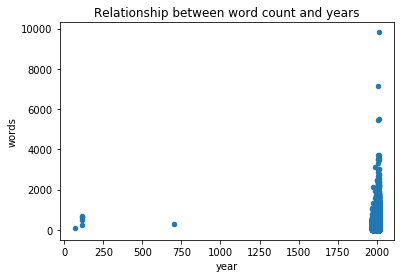

In [24]:
#show data that maybe an outlier or need cleaning
#based on the graph years need to be cleaned and I need to address the outlier of words 
#greater than 6000
df_new_songlist.plot.scatter(x='year',y='words',title='Relationship between word count and years')
plt.show()

(262909, 17)


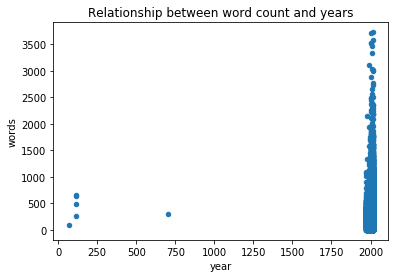

In [26]:
#remove rows that represent outliers where the number of words is greater than 4000
df_new_songlist = df_new_songlist[(df_new_songlist.words<=4000)]
print(df_new_songlist.shape)
df_new_songlist.plot.scatter(x='year',y='words',title='Relationship between word count and years')
plt.show()

In [27]:
#review and clean the year data 
df_new_songlist.year.unique()

array([2009, 2007, 2013, 2010, 2012, 2006, 2016, 2011, 2015, 2008, 2014,
       1998, 2002, 1995, 2004, 1972, 2005, 1978, 1970, 1981, 1994, 1997,
       1993, 1982, 1983, 1986, 1992, 1977, 1989, 1979, 1996, 2001, 1990,
       1987, 2003, 1975, 1973, 1991, 1999, 1974, 2000, 1980, 1984, 1976,
        702, 1971, 1985, 1988,  112, 1968,   67])

In [28]:
#get the list of records where the year column is invalid
df5 = df_new_songlist[(df_new_songlist.year.isin([702,112,67]))]
df5

,index,song,year,artist,genre,lyrics,clean_lyrics,lemmatized,lemmatized_features,sentiment score,compound,neg,neu,pos,sentiment_label,sentiment_label_code,words
27657,27657,star,702,clipse,Hip-Hop,You're my star\nIt's such a wonder how you shi...,You're my star It's such a wonder how you shin...,You 're my star It 's such a wonder how you sh...,Youre my star Its such a wonder how you shine ...,"{'neg': 0.049, 'neu': 0.818, 'pos': 0.134, 'co...",0.9799,0.049,0.818,0.134,Positive,1,305
69708,69708,anywhere-remix,112,dru-hill,Hip-Hop,"Here we are all alone\nYou and me, privacy\nAn...","Here we are all alone You and me, privacy And ...","Here we be all alone You and me , privacy And ...",Here we are all alone You and me privacy And w...,"{'neg': 0.021, 'neu': 0.822, 'pos': 0.157, 'co...",0.9976,0.021,0.822,0.157,Positive,1,632
147914,147914,it-s-over-now-remix,112,g-dep,Hip-Hop,What is this?\nNumbers in your pocket\nI remem...,What is this? Numbers in your pocket I remembe...,What be this ? Numbers in your pocket I rememb...,What is this Numbers in your pocket I remember...,"{'neg': 0.12, 'neu': 0.802, 'pos': 0.078, 'com...",-0.9568,0.120,0.802,0.078,Negative,-1,492
238541,238541,come-see-me-remix,112,black-rob,Hip-Hop,"Baby, you can come see me 'cause I need you he...","Baby, you can come see me 'cause I need you he...","Baby , you can come see me 'cause I need you h...",Baby you can come see me cause I need you here...,"{'neg': 0.008, 'neu': 0.788, 'pos': 0.205, 'co...",0.9990,0.008,0.788,0.205,Positive,1,667
315540,315540,let-s-lurk,67,giggs,Hip-Hop,Verse 1:\nStill pulling up on smoke\nSkeng in ...,Verse 1: Still pulling up on smoke Skeng in my...,Verse 1 : Still pull up on smoke Skeng in my p...,Verse Still pulling up on smoke Skeng in my po...,"{'neg': 0.135, 'neu': 0.746, 'pos': 0.119, 'co...",-0.1838,0.135,0.746,0.119,Negative,-1,94
335205,335205,i-can-t-believe,112,faith-evans,Pop,[Chorus]\nI can't believe that love has gone a...,[Chorus] I can't believe that love has gone aw...,[ Chorus ] I ca n't believe that love have go ...,I cant believe that love has gone away from me...,"{'neg': 0.155, 'neu': 0.79, 'pos': 0.056, 'com...",-0.9777,0.155,0.790,0.056,Negative,-1,263


In [29]:
#Perform research and determine the year the song was released
#update the year column with the correct years
df_new_songlist.loc[27657,'year'] = 2003 #Year:702 artist: clip song: star

df_new_songlist.loc[315540,'year'] = 2016 #Year: 67 artist: giggs song: let-s-lurk

df_new_songlist.loc[147914,'year'] = 2001 #Year: 112 artist: g-dep song: it-s-over-now-remix

df_new_songlist.loc[238541,'year'] = 1996 #Year: 112 artist: black-rob song: come-see-me-remix

df_new_songlist.loc[335205,'year'] = 2001 #Year: 112 artist: faith-evans song: i-can-t-believe

df_new_songlist.loc[69708,'year'] = 1999 #Year: 112 artist: dru-hill song: anywhere-remix



In [31]:
#confirm the incorrect year values don't exist
df_new_songlist.year.unique()

array([2009, 2007, 2013, 2010, 2012, 2006, 2016, 2011, 2015, 2008, 2014,
       1998, 2002, 1995, 2004, 1972, 2005, 1978, 1970, 1981, 1994, 1997,
       1993, 1982, 1983, 1986, 1992, 1977, 1989, 1979, 1996, 2001, 1990,
       1987, 2003, 1975, 1973, 1991, 1999, 1974, 2000, 1980, 1984, 1976,
       1971, 1985, 1988, 1968])

# Explore Data and show relationships

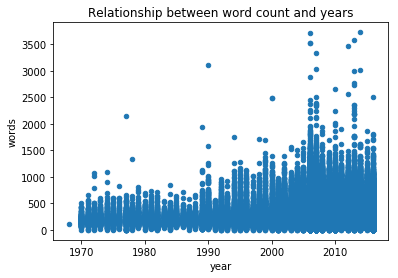

In [32]:
#show the updated scatter plot with the relationship between the continuous cleaned
#variables year and words  
df_new_songlist.plot.scatter(x='year',y='words',title='Relationship between word count and years')
plt.show()

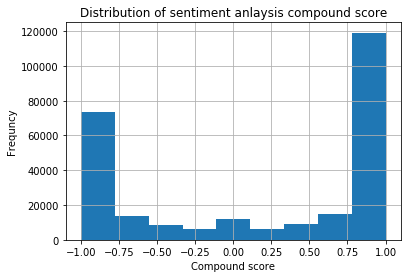

In [33]:
#show the distribution of the sentiment analysis compound score
plt.figure()
df_new_songlist['compound'].hist(bins=9)
plt.title("Distribution of sentiment anlaysis compound score")
plt.xlabel("Compound score")
plt.ylabel("Frequncy")
plt.show()

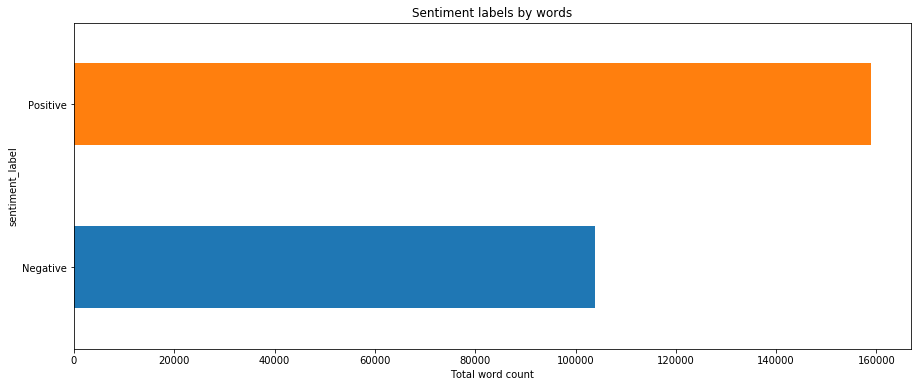

In [34]:
#show the sentiment analysis labels related to the total word count
fig, ax = plt.subplots(figsize=(15,6))
#df_saved_songlist.groupby``(['sentiment_label']).count()['words'].plot(kind='barh',ax=ax, title='Sentiment labels by word count')
df_new_songlist.groupby(['sentiment_label']).count()['words'].plot(kind='barh',ax=ax, title='Sentiment labels by words')
plt.xlabel("Total word count")
plt.show()

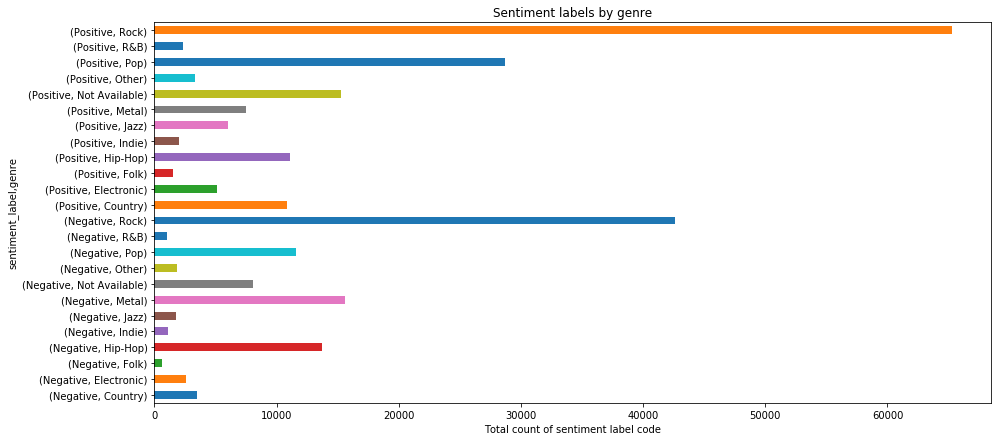

In [35]:
#show the sentiment analysis
fig, ax = plt.subplots(figsize=(15,7))
#df_saved_songlist.groupby(['sentiment_label','genre' ]).count()['sentiment_label_code'].plot(kind='barh',ax=ax, title='Sentiment labels by genre and word count')
df_new_songlist.groupby(['sentiment_label','genre' ]).count()['sentiment_label_code'].plot(kind='barh',ax=ax, title='Sentiment labels by genre')
plt.xlabel("Total count of sentiment label code")
plt.show()

In [36]:
#show examples of positive songs
#df = df_saved_songlist[(df_saved_songlist.sentiment_label == 'Positive') & (df_saved_songlist.genre == 'R&B')] 
df = df_new_songlist[(df_new_songlist.sentiment_label == 'Positive') & (df_new_songlist.genre == 'R&B')] 
print(df.shape)

sample = df.groupby(['sentiment_label','artist']).count()['song']
sample.head()

(2350, 17)


sentiment_label  artist           
Positive         1984                  5
                 24hrs                 3
                 30-dirty-thoughts     7
                 4-skins               3
                 7-seconds            36
Name: song, dtype: int64

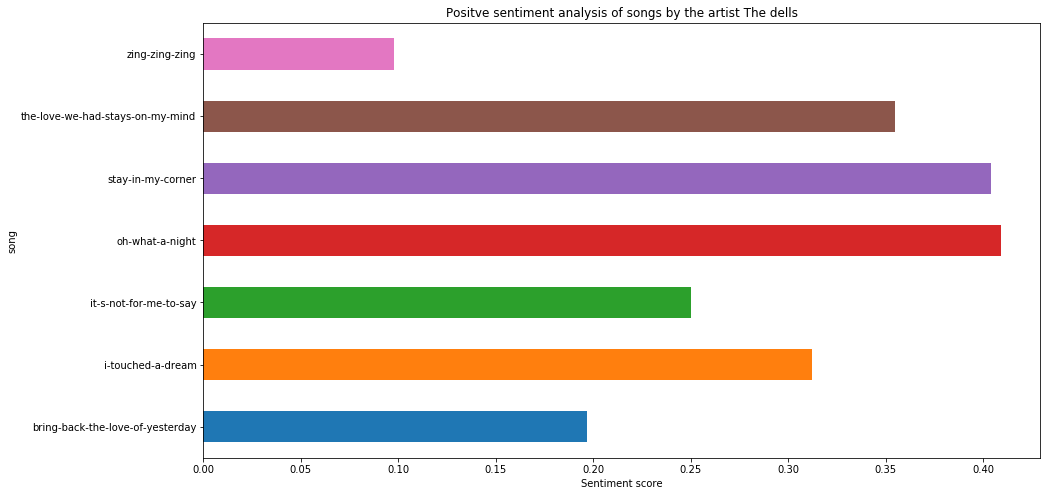

In [37]:
#apply the filter criteria for song with positive labels for a given artist. 
df = df_new_songlist[(df_new_songlist.sentiment_label == 'Positive') & (df_new_songlist.genre == 'R&B') & (df_new_songlist.artist == 'the-dells')] 
#df.shape
fig, ax = plt.subplots(figsize=(15,8))
sample = df.groupby(['song']).sum()['pos'].plot(kind='barh',ax=ax,title='Positve sentiment analysis of songs by the artist The dells')
sample
plt.xlabel("Sentiment score")
plt.show()

In [38]:
#apply the filter criteria for song with negative labels for a given artist. 
#df = df_saved_songlist[(df_saved_songlist.sentiment_label == 'Negative') & (df_saved_songlist.genre == 'Hip-Hop')] 
df = df_new_songlist[(df_new_songlist.sentiment_label == 'Negative') & (df_new_songlist.genre == 'Hip-Hop')] 
print(df.shape)

sample = df.groupby(['sentiment_label','artist']).count()['song']
sample.head()

(13678, 17)


sentiment_label  artist                              
Negative         112                                     16
                 1982                                     4
                 1982-termanology-and-statik-selektah     1
                 2-chainz                                81
                 2-live-crew                             51
Name: song, dtype: int64

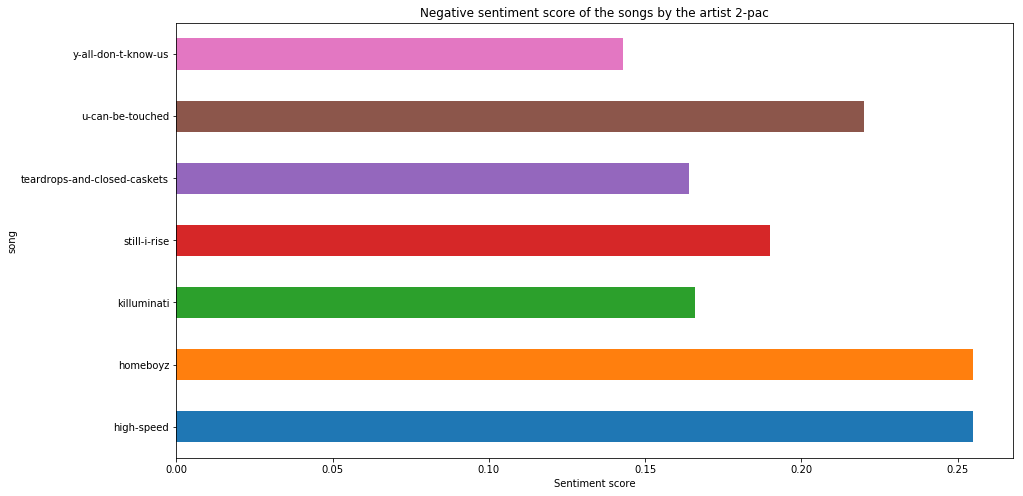

In [39]:
#apply filter and show plot
#df = df_saved_songlist[(df_saved_songlist.sentiment_label == 'Negative') & (df_saved_songlist.genre == 'Hip-Hop') & (df_saved_songlist.artist == '2pac-outlawz')] 
df = df_new_songlist[(df_new_songlist.sentiment_label == 'Negative') & (df_new_songlist.genre == 'Hip-Hop') & (df_new_songlist.artist == '2pac-outlawz')] 
#df.shape

fig, ax = plt.subplots(figsize=(15,8))
sample = df.groupby(['song']).sum()['neg'].plot(kind='barh',ax=ax,title='Negative sentiment score of the songs by the artist 2-pac')
sample
plt.xlabel("Sentiment score")
plt.show()

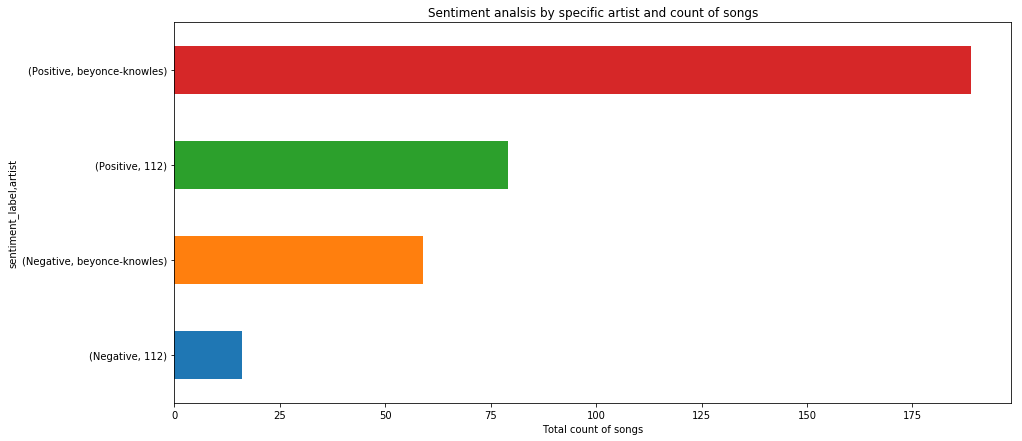

In [59]:
#Show sentiment analysis and total count of songs for random artist 
fig, ax = plt.subplots(figsize=(15,7))
df5 = df_new_songlist[(df_new_songlist.artist.isin(['beyonce-knowles','112']))]
df6 = df5.groupby(['sentiment_label','artist']).count()['song'].plot(kind='barh',ax=ax, title='Sentiment analsis by specific artist and count of songs')
df6
plt.xlabel("Total count of songs")
plt.show()

In [40]:
#find the highest word count by genre
#df_new_songlist['genre'] = df_new_songlist['genre'] != 'Not Available'
#word_count_by_genre = df_saved_songlist.groupby(['genre']).mean()['words']
word_count_by_genre = df_new_songlist.groupby(['genre']).mean()['words']
word_count_by_genre

genre
Country          208.601913
Electronic       230.401834
Folk             216.825036
Hip-Hop          572.252281
Indie            224.731723
Jazz             200.628754
Metal            193.853019
Not Available    245.261272
Other            254.646798
Pop              282.283416
R&B              263.803950
Rock             218.951466
Name: words, dtype: float64

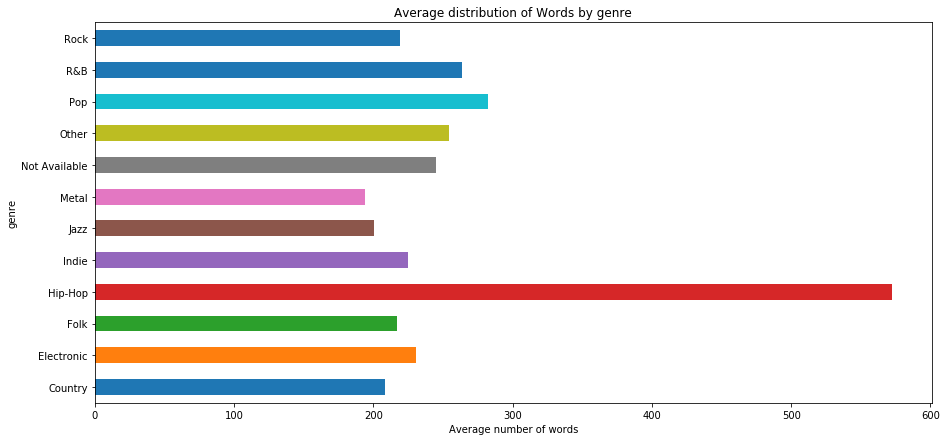

In [41]:
#graph to display the number of words by genre
fig, ax = plt.subplots(figsize=(15,7))
#df_saved_songlist.groupby(['genre']).mean()['words'].plot(kind='barh',ax=ax, title='Average distribution of Words by genre')
df_new_songlist.groupby(['genre']).mean()['words'].plot(kind='barh',ax=ax, title='Average distribution of Words by genre')
plt.xlabel("Average number of words")
plt.show()

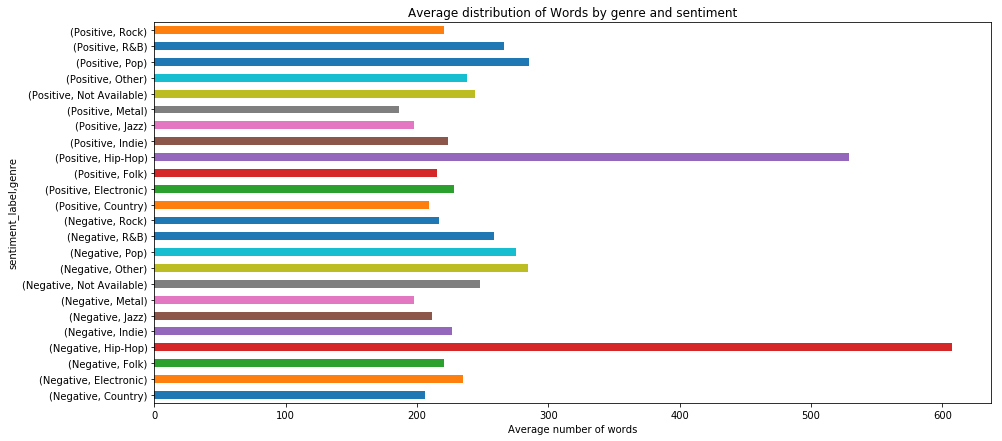

In [42]:
#graph to display the number of words by genre
fig, ax = plt.subplots(figsize=(15,7))  
#df_saved_songlist.groupby(['genre']).mean()['words'].plot(kind='barh',ax=ax, title='Average distribution of Words by genre')
df_new_songlist.groupby(['sentiment_label','genre']).mean()['words'].plot(kind='barh',ax=ax, title='Average distribution of Words by genre and sentiment')
plt.xlabel("Average number of words")
plt.show()

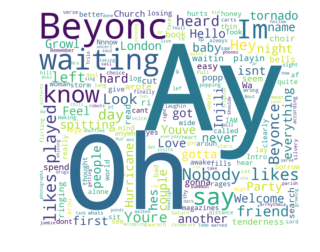

In [63]:
#Word Cloud is a data visualization technique used for representing text data in 
#which the size of each word indicates its frequency or importance. 

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#word_string = str(df_saved_songlist['lemmatized'])
word_string = str(df_new_songlist['lemmatized_features'])
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000
                     ).generate(word_string)


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Song Recommendation

In [43]:
def get_recommendations(song, artist):
    
    #create two dataframes that represent positive and negative songs only    
    df_positive_songs = df_new_songlist[(df_new_songlist['sentiment_label'] == 'Positive')]

    df_negative_songs = df_new_songlist[(df_new_songlist['sentiment_label'] == 'Negative')]

    #find the song based on the information provided by the user
    df_get_song_artist = df_new_songlist[(df_new_songlist.song == song) & (df_new_songlist.artist == artist)]

    #determine if the given song is positive or negative. This will determine which dataframe
    #we will use.

    if df_get_song_artist['sentiment_label'].values == 'Positive':
        #use the positive dataframe to get the list of songs
        df_get_song_list = df_positive_songs[(df_positive_songs['compound'].values >= df_get_song_artist['compound'].values) & 
                                             (df_positive_songs['genre'].values == df_get_song_artist['genre'].values) &
                                              (df_positive_songs['year'].values >= df_get_song_artist['year'].values)]

        df_get_song_list = df_get_song_list.sort_values(['compound'],ascending=True)

        # Get the 10 most similar songs
        top_songs = df_get_song_list[0:10]
        
        print("The name of the song provided: %s" % (song))
        print("The name of the artist provided: %s" % (artist))
        print("The genre of the artist provided: %s" % (df_get_song_artist.genre.values))
        print("The year of the song provided: %s" % (df_get_song_artist.year.values))
        print("The song is considered positive with a score of: %s" % (df_get_song_artist['compound'].values))  
        
        return(top_songs[['artist','song','genre','year','compound','sentiment_label']])

    else:

        df_get_song_list = df_negative_songs[(df_negative_songs['compound'].values >= df_get_song_artist['compound'].values) & 
                                             (df_negative_songs['genre'].values == df_get_song_artist['genre'].values) &
                                              (df_negative_songs['year'].values >= df_get_song_artist['year'].values)]

        df_get_song_list = df_get_song_list.sort_values(['compound'],ascending=True)

        # Get the 10 most similar songs
        top_songs = df_get_song_list[0:10]
        
        print("The name of the song provided: %s" % (song))
        print("The name of the artist provided: %s" % (artist))
        print("The genre of the artist provided: %s" % (df_get_song_artist.genre.values))
        print("The year of the song provided: %s" % (df_get_song_artist.year.values))
        print("The song is considered negative with a score of: %s" % (df_get_song_artist['compound'].values))  
 

        return(top_songs[['artist','song','genre','year','compound','sentiment_label']])


In [44]:
get_recommendations('honesty','beyonce-knowles')

The name of the song provided: honesty
The name of the artist provided: beyonce-knowles
The genre of the artist provided: ['Pop']
The year of the song provided: [2009]
The song is considered positive with a score of: [0.9819]


,artist,song,genre,year,compound,sentiment_label
306930,american-idol,in-the-still-of-the-night,Pop,2012,0.9819,Positive
307127,american-idol,the-circle-of-life,Pop,2011,0.9819,Positive
156433,christopher-wilde,what-you-mean-to-me,Pop,2010,0.9819,Positive
283079,carly-rae-jepsen,turn-me-up,Pop,2012,0.9819,Positive
87918,emma-acs,very-own-human,Pop,2013,0.9819,Positive
81048,george-michael,kissing-a-fool,Pop,2011,0.9819,Positive
260673,fergie,you-already-know,Pop,2016,0.9819,Positive
116348,gloria-estefan,how-long-has-this-been-going-on,Pop,2013,0.9819,Positive
83344,alexa-borden,hope-in-the-shambles,Pop,2010,0.9819,Positive
310330,ashley-jana,spin-the-bottle,Pop,2012,0.9819,Positive


In [45]:
get_recommendations('high-speed','2pac-outlawz')

The name of the song provided: high-speed
The name of the artist provided: 2pac-outlawz
The genre of the artist provided: ['Hip-Hop']
The year of the song provided: [2008]
The song is considered negative with a score of: [-0.9969]


,artist,song,genre,year,compound,sentiment_label
119249,chinx-drugz,paranoid-remix,Hip-Hop,2014,-0.9969,Negative
216355,2pac-outlawz,high-speed,Hip-Hop,2008,-0.9969,Negative
51691,ace-hood,brothers-keeper,Hip-Hop,2014,-0.9969,Negative
173914,dj-premier-bumpy-knuckles,d-lah,Hip-Hop,2012,-0.9969,Negative
126170,dmx,i-m-back,Hip-Hop,2012,-0.9969,Negative
310688,cam-meekins,cut-me-off,Hip-Hop,2012,-0.9969,Negative
313239,eminem,thats-all-she-wrote,Hip-Hop,2010,-0.9969,Negative
137437,cupcakke,image,Hip-Hop,2016,-0.9969,Negative
173911,dj-premier-bumpy-knuckles,more-levels,Hip-Hop,2012,-0.9969,Negative
9016,50-cent,get-low,Hip-Hop,2015,-0.9969,Negative


# Generate features and add words to stopswords list

In [46]:
# Defining my X and Y variables

X = df_new_songlist.lemmatized_features
Y = df_new_songlist.sentiment_label_code

In [47]:
import nltk
from nltk.corpus import stopwords
# load nltk's English stopwords as variable called 'stopwords' we will use this as a parameter
# in the TFIDF function. I will also add words from the word cloud to the stopwords list

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['oh','know','Ay','ay','waiting','say','know','n\'t','chorus','verse',
               'aa','aaa','aaaa','aaaaa','aaaaaa','aaaaaaa','aaaaaaaa','aaaaaaaaa',
               'aaaaaaaaaaaa', 'aaaaaaaaaaaaa','zz','zzt','zzh','zzzzz',
               'don\'t','got','get','wont','go','aaaaaaaaaaaaaaaa',
               'aaaaaaaaaaaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaah','aaaaaaaaaaaaaah',
                'aaaaaaaaaaaaah','aaaaaaaaaaaaaww','aaaaaaaaaaaah','aaaaaaaaaaah','aaaaaaaaaah',
                'aaaaaaaaah','cant','aaaaaaaah','aaaaaaaahhhhhhhhhh','aaaaaaah','aaaaaaahhh',
                'aaaaaaahhhh','aaaaaah','aaaaaahhhhhh','aaaaaahhhhhhh','aaaaaahhhhhhhhh']
stopwords.extend(newStopWords)

#remove spanish common stopwords as we have spansih songs in our dataset
stopwords_spanish = nltk.corpus.stopwords.words('spanish')
stopwords.extend(stopwords_spanish)

#remove german common stopwords as we have german songs in our dataset
stopwords_german = nltk.corpus.stopwords.words('german')
stopwords.extend(stopwords_german)

#remove german common stopwords as we have french songs in our dataset
stopwords_french = nltk.corpus.stopwords.words('french')
stopwords.extend(stopwords_french)

In [48]:
from sklearn.model_selection import train_test_split
#splitting into training and test sets. Reserving 25% of my corpus as a test set.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)
#max_df=0.90 and min_df=.01 = 1029

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.75, # drop words that occur in more than 3/4 of the sentence
                             min_df=2, # only use words that appear at least twice 
                             stop_words=stopwords, 
                             lowercase=True,
                             use_idf=True, # use inverse document frequencies in our weighting
                             norm=u'l2', # Apply a correction factor so that longer sentences and shorter sentences get treated equally
                             smooth_idf=True # Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                             #ngram_range=(1,3)                             
                            )

# Apply the vectorizer
X_train_tfidf = vectorizer.fit_transform(X_train)
print(X_train_tfidf.shape)
terms = vectorizer.get_feature_names()
X_tfidf = pd.DataFrame(data=X_train_tfidf.toarray(),
             columns=terms)
X_test_tfidf=vectorizer.transform(X_test) #use this to test the model

X_tfidf.head()

(197181, 169921)


,aaaaaaaaaa,aaaaaaaaaaa,aaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaalright,aaaaah,aaaaahh,aaaaahhh,aaaaahhhhh,aaaaall,aaaah,aaaahaahahahaa,aaaahh,aaaahhh,aaaahhhh,aaaahhhhhh,aaaall,aaaamen,aaaand,aaaass,aaah,aaahalbum,aaahblue,aaahh,aaahhh,aaahhhh,aaahhhhh,aaahhhhhh,aaahhhhhhh,aaall,aaalways,aaamen,aaand,aaargh,aaaww,aaawww,aaay,aab,aabutin,aadi,aadirme,aafat,aag,aage,aagh,aagosh,aah,aaha,aahaaaah,aahaah,aahaahaah,aahaahaahaah,aahatein,aahh,aahhaa,aahhh,aahhhh,aahhhhh,aahhhhhh,aahoh,aahon,aahooh,aahs,aaight,aain,aaj,aaja,aake,aakhen,aakhir,aakhon,aakyatin,aal,aalagaan,aalalayan,aalar,aale,aalglatte,aalike,aalikes,aaliyah,aaliyahs,aall,aallot,aalto,aalways,aam,aami,aaminin,aamu,aamua,aamuin,aamuisin,aamulla,aamun,aamuna,aamund,aamunkoitteessa,aamut,aamuun,...,zusehen,zuspruch,zustand,zut,zutaten,zute,zutiefst,zutsu,zutto,zuur,zuversicht,zuviel,zuviele,zuvieles,zuvor,zuweilen,zuweit,zuwenig,zuwi,zuzugeben,zvat,zveckaju,zvezde,zvijezde,zvona,zvone,zvuci,zvuk,zwa,zwaai,zwaaien,zwaar,zwang,zwangen,zwanzig,zware,zwart,zwarte,zweck,zwecks,zweeft,zweer,zwei,zweideutig,zweien,zweier,zweierlei,zweifel,zweifeln,zweifelnde,zweigen,zweimal,zwein,zweisamkeit,zweit,zweitausend,zweite,zweitem,zweiten,zweitens,zweiter,zweites,zwerge,zwergenwelt,zweten,zweven,zwi,zwicken,zwielicht,zwijgen,zwijgt,zwilling,zwing,zwingen,zwingt,zwinkert,zwischendrin,zwischendurch,zwischenzeit,zwlf,zwngen,zwo,zwoele,zwoelf,zwykle,zx,zxulth,zy,zyankalilaune,zych,zydeco,zygote,zyklen,zyklon,zyklus,zylinder,zyskowicz,zyt,zzz,zzzzs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Generate word topics

In [49]:
# Number of topics. increase from 5 to 20
ntopics=50

# Linking words to topics
def word_topic(X_tfidf,solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=X_tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=chosenlist
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 10

In [50]:
# LSA

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd= TruncatedSVD(ntopics)
lsa = make_pipeline(svd, Normalizer(copy=False))
tfidf_train_lsa = lsa.fit_transform(X_train_tfidf)
tfidf_test_lsa = lsa.transform(X_test_tfidf) # used in our models

components_lsa = word_topic(X_train_tfidf, tfidf_train_lsa, terms)
#print(components_lsa)

topwords=pd.DataFrame()
topwords['LSA']=top_words(components_lsa, n_top_words)    

In [51]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=ntopics, 
          doc_topic_prior=None, # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7, # Convergence rate.
          learning_offset=10.0, # Causes earlier iterations to have less influence on the learning
          max_iter=10, # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1, # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.001, # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=100, # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=-1, # Use all available CPUs to speed up processing time.
          verbose=0, # amount of output to give while iterating
          random_state=0
         )

X_train_lda = lda.fit_transform(X_train_tfidf) 
X_test_lda = lda.transform(X_test_tfidf) # used in our models



components_lda = word_topic(X_train_tfidf, X_train_lda, terms)

topwords['LDA']=top_words(components_lda, n_top_words)

In [52]:
# NNMF

from sklearn.decomposition import NMF

nmf = NMF(alpha=0.0, 
          init='nndsvdar', # how starting value are calculated
          l1_ratio=0.0, # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=200, # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd', # Use Coordinate Descent to solve
          tol=0.0001, # model will stop if tfidf-WH <= tol
          verbose=0 # amount of output to give while iterating
         )
X_train_nmf = nmf.fit_transform(X_train_tfidf) 

components_nmf = word_topic(X_train_tfidf, X_train_nmf, terms)

topwords['NNMF']=top_words(components_nmf, n_top_words)

In [81]:
for topic in range(ntopics):
    print('Topic {}:'.format(topic))
    print(topwords.loc[topic])

Topic 0:
             LSA              LDA           NNMF
0   love 3191.88       love 22.81   theres 19.66
0   dont 2960.93      merry 20.73  nothing 18.79
0   like 2443.98  christmas 19.78     love 10.46
0  youre 1976.76       dont 19.41     dont 10.39
0   time 1899.06     little 16.24  something 8.8
0  never 1887.64       like 15.58      like 7.84
0    one 1833.83         us 13.57     youre 7.52
0    see 1795.36      youre 13.34      time 7.39
0   want 1725.63        time 12.6     never 6.96
0    ill 1619.34        let 12.59       one 6.92
Topic 1:
             LSA          LDA         NNMF
1    love 1901.6    cest 65.6  love 221.68
1    baby 236.93   tout 50.86   dont 43.42
1   heart 167.22  comme 47.13   baby 38.21
1     true 87.58    jai 46.68   like 30.73
1  darling 54.68   plus 39.44   want 30.26
1    sweet 52.73     si 36.74  heart 30.05
1  forever 46.08  quand 35.69  never 30.04
1   loving 45.59    vie 35.04  youre 29.37
1    loves 42.45   sans 30.24    one 27.61
1     arms 38

42      like 58.67   baby 12.94   never 9.93
Topic 43:
             LSA          LDA         NNMF
43    day 211.24   love 24.39   long 43.78
43   take 170.02    dont 21.0   gone 34.47
43     us 150.14   like 16.88   love 18.99
43  world 118.78   youre 14.6   dont 16.34
43   would 95.21   time 13.49   time 15.01
43     ever 95.2  never 13.26  youre 12.62
43   every 84.25   want 13.26   like 12.14
43    still 77.1    one 13.22     way 11.7
43  always 68.73   baby 13.03    ive 11.62
43     see 65.75    see 12.68    ill 11.29
Topic 44:
            LSA               LDA         NNMF
44  well 316.01  christmas 117.66   hold 49.88
44   ooh 151.49       merry 29.91   love 19.84
44  feel 145.96        love 29.37   dont 14.86
44  right 95.28        dont 23.49   want 10.63
44   home 88.35   wonderland 20.4   like 10.51
44    see 86.27        like 20.09    let 10.41
44   give 86.19        snow 19.65  youre 10.19
44  cause 81.55        bells 19.6    ill 10.07
44    hold 79.9        time 19.45   nev

# Generate Models

In [80]:
#Execute the RandomForestClassifier Model
#remove the warnings related to default parameters
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import tree

param_grid = {'max_depth': [10, 20, 30],
             'max_features': ['auto', 'sqrt']}

scores = ['percision','recall','f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
dtc = tree.DecisionTreeClassifier()
grid_clf_dtc = GridSearchCV(dtc, param_grid, cv=3, scoring='%s_macro' % score)
train = grid_clf_dtc.fit(X_train_tfidf, y_train)
y_pred = grid_clf_dtc.predict(X_test_tfidf)

#Print best parameter and training score
print('Best parameter choice for logistic model: {params}'.format(
      params=grid_clf_dtc.best_params_, score=grid_clf_dtc.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_dtc.best_params_, score=grid_clf_dtc.best_score_))


print('\n Decison Tree confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Decison Tree classification report \n',classification_report(y_test,y_pred))  
print('Decison Tree accuracy score:',accuracy_score(y_test, y_pred)) 


#create a result table
data = [{'Model':'Decision Tree', 'Training score': grid_clf_dtc.best_score_,
         'Accuracy': accuracy_score(y_test, y_pred)}]
df_results = pd.DataFrame(data)

df_results

#print('Best parameter choice for this SVC regression model: \n\t{params}'
#      '\n(according to cross-validation {cv} on the whole dataset).'.format(
#      params=grid_clf_dtc.best_params_, cv=3))

#means = grid_clf_dtc.cv_results_['mean_test_score']
#    stds = grid_clf_dtc.cv_results_['std_test_score']
#    for mean, std, params in zip(means, stds, grid_clf_dtc.cv_results_['params']):
#        print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
        
#compare the training and testing results using cross validation
#from sklearn.model_selection import cross_val_score
#cv_results_train = cross_val_score(grid_clf_dtc, X_train_tfidf, y_train, cv=5)
#cv_results_test = cross_val_score(grid_clf_dtc, X_test_tfidf, y_test, cv=5)
#nb_accuracy = accuracy_score(y_test, y_pred)
#print('Decison Tree Training mean set score:', cv_results_train.mean())
#print('Decison Tree mean set score:', cv_results_test.mean())

# Tuning hyper-parameters for percision

# Tuning hyper-parameters for recall

# Tuning hyper-parameters for f1

Best parameter choice for logistic model: {'max_depth': 30, 'max_features': 'sqrt'}
Training score for the best parameter: 0.5423075087860151

 Decison Tree confusion matrix 
 [[ 7466 18293]
 [ 3865 36104]]

 Decison Tree classification report 
               precision    recall  f1-score   support

          -1       0.66      0.29      0.40     25759
           1       0.66      0.90      0.77     39969

   micro avg       0.66      0.66      0.66     65728
   macro avg       0.66      0.60      0.58     65728
weighted avg       0.66      0.66      0.62     65728

Decison Tree accuracy score: 0.6628833982473223


,Accuracy,Model,Training score
0,0.662883,Decision Tree,0.542308


In [81]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'alpha': [3, 5, 7, 10]}

scores = ['precision','recall','f1']
for score in scores:
    print("# Tuning hyper-parameters for %s" %  score)
    print()


nb = MultinomialNB()
grid_clf_nb = GridSearchCV(nb, param_grid, cv=3, scoring='%s_macro' % score)

train = grid_clf_nb.fit(X_train_tfidf, y_train)
y_pred = grid_clf_nb.predict(X_test_tfidf)

#Print best parameter and training score
print('Best parameter choice for logistic model: {params}'.format(
      params=grid_clf_nb.best_params_, score=grid_clf_nb.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_nb.best_params_, score=grid_clf_nb.best_score_))

print('\n Naive Bayes cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Naive Bayes classification report \n',classification_report(y_test,y_pred))  
print('Naive Bayes accuracy score:',accuracy_score(y_test, y_pred))  


#update result table
data = [{'Model':'Navie Bayes', 'Training score': grid_clf_nb.best_score_,
         'Accuracy': accuracy_score(y_test, y_pred)}]
d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

#print('Best parameter choice for this Random forest regression model: \n\t{params}'
#      '\n(according to cross-validation `{cv}` on the whole dataset).'.format(
#      params=grid_clf_nb.best_params_, cv=3))

#training = grid_clf_nb.cv_results_['mean_train_score']
#means = grid_clf_nb.cv_results_['mean_test_score']
#stds = grid_clf_nb.cv_results_['std_test_score']
#for mean, std, params in zip(training, means, stds, grid_clf_sgdc.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r"
#            % (mean, std * 2, params))


#compare the training and testing results using cross validation
#from sklearn.model_selection import cross_val_score
#cv_results_train = cross_val_score(nb, X_train_tfidf, y_train, cv=5)
#cv_results_test = cross_val_score(nb, X_test_tfidf, y_test, cv=5)
#nb_accuracy = accuracy_score(y_test, y_pred)
#print('Navie Bayes Training mean set score:', cv_results_train.mean())
#print('Navie Testing mean set score:', cv_results_test.mean())

#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print('\n KNN Confustion Matrix \n', confusion_matrix(y_test,y_pred))  
#print('\n Naive Bayes Classification Report \n', classification_report(y_test,y_pred))  
#print('Naive Bayes accuracy score:', )  



# Tuning hyper-parameters for precision

# Tuning hyper-parameters for recall

# Tuning hyper-parameters for f1

Best parameter choice for logistic model: {'alpha': 3}
Training score for the best parameter: 0.587387951553774

 Naive Bayes cufusion matrix 
 [[ 7579 18180]
 [ 1876 38093]]

 Naive Bayes classification report 
               precision    recall  f1-score   support

          -1       0.80      0.29      0.43     25759
           1       0.68      0.95      0.79     39969

   micro avg       0.69      0.69      0.69     65728
   macro avg       0.74      0.62      0.61     65728
weighted avg       0.73      0.69      0.65     65728

Naive Bayes accuracy score: 0.6948636806231743


,Accuracy,Model,Training score
0,0.662883,Decision Tree,0.542308
0,0.694864,Navie Bayes,0.587388


In [82]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

param_grid = {'C': [6,7,8,9,10,11,12]}

scores = ['precision','recall','f1']
for score in scores:
    print("# Tuning hyper-parameters for %s" %  score)
    print()


svc = LinearSVC()
grid_clf_svm = GridSearchCV(svc, param_grid, cv=3, scoring='%s_macro' % score)

train = grid_clf_svm.fit(X_train_tfidf, y_train)
y_pred = grid_clf_svm.predict(X_test_tfidf)
#nb_accuracy = accuracy_score(y_test, y_pred)

#Print best parameter and training score
print('Best parameter choice for logistic model: {params}'.format(
      params=grid_clf_svm.best_params_, score=grid_clf_svm.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_svm.best_params_, score=grid_clf_svm.best_score_))

print('\n Support vector cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Support vector classification report \n',classification_report(y_test,y_pred))  
print('Support vector accuracy score:',accuracy_score(y_test, y_pred))  

#update result table
data = [{'Model':'Support Vector', 'Training score': grid_clf_svm.best_score_,
         'Accuracy': accuracy_score(y_test, y_pred)}]
d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

#print('Best parameter choice for this SVC regression model: \n\t{params}'
#      '\n(according to cross-validation `{cv}` on the whole dataset).'.format(
#      params=grid_clf_svm.best_params_, cv=3))

#compare the training and testing results using cross validation
#cv_results_train = cross_val_score(grid_clf_svm, X_train_tfidf, y_train, cv=5)
#cv_results_test = cross_val_score(grid_clf_svm, X_test_tfidf, y_test, cv=5)
#print('SVC Training mean set score:', cv_results_train.mean())
#print('SVC Testing mean set score:', cv_results_test.mean())


# Tuning hyper-parameters for precision

# Tuning hyper-parameters for recall

# Tuning hyper-parameters for f1

Best parameter choice for logistic model: {'C': 6}
Training score for the best parameter: 0.8067191845365842

 Support vector cufusion matrix 
 [[19428  6331]
 [ 5148 34821]]

 Support vector classification report 
               precision    recall  f1-score   support

          -1       0.79      0.75      0.77     25759
           1       0.85      0.87      0.86     39969

   micro avg       0.83      0.83      0.83     65728
   macro avg       0.82      0.81      0.82     65728
weighted avg       0.82      0.83      0.82     65728

Support vector accuracy score: 0.8253560126582279


,Accuracy,Model,Training score
0,0.662883,Decision Tree,0.542308
0,0.694864,Navie Bayes,0.587388
0,0.825356,Support Vector,0.806719


In [83]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {'C': [6,7,8,9,10,11,12],
             'penalty': ['l1','l2']
             }


scores = ['precision','recall','f1']
for score in scores:
    print("# Tuning hyper-parameters for %s" %  score)
    print()


lr = LogisticRegression(n_jobs=1)
grid_clf_lr = GridSearchCV(lr, param_grid, cv=3, scoring='%s_macro' % score)

train = grid_clf_lr.fit(X_train_tfidf, y_train)
y_pred = grid_clf_lr.predict(X_test_tfidf)

#Print best parameter and training score
print('Best parameter choice for logistic model: {params}'.format(
      params=grid_clf_lr.best_params_, score=grid_clf_lr.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_lr.best_params_, score=grid_clf_lr.best_score_))

print('\n Logistic cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Logistic classification report \n',classification_report(y_test,y_pred))  
print('Logistic accuracy score:',accuracy_score(y_test, y_pred))  


#update result table
data = [{'Model':'Logistic Regression', 'Training score': grid_clf_lr.best_score_,
         'Accuracy': accuracy_score(y_test, y_pred)}]
d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

#print('Best parameter choice for this Random forest regression model: \n\t{params}'
#      '\n(according to cross-validation `{cv}` on the whole dataset).'.format(
#      params=grid_clf_lr.best_params_, cv=3))

#compare the training and testing results using cross validation
#from sklearn.model_selection import cross_val_score
#cv_results_train = cross_val_score(grid_clf_lr, X_train_tfidf, y_train, cv=5)
#cv_results_test = cross_val_score(grid_clf_lr, X_test_tfidf, y_test, cv=5)
#nb_accuracy = accuracy_score(y_test, y_pred)
#print('LR Training mean set score:', cv_results_train.mean())
#print('LR Testing mean set score:', cv_results_test.mean())


# Tuning hyper-parameters for precision

# Tuning hyper-parameters for recall

# Tuning hyper-parameters for f1

Best parameter choice for logistic model: {'C': 6, 'penalty': 'l2'}
Training score for the best parameter: 0.8350417561037704

 Logistic cufusion matrix 
 [[20056  5703]
 [ 4047 35922]]

 Logistic classification report 
               precision    recall  f1-score   support

          -1       0.83      0.78      0.80     25759
           1       0.86      0.90      0.88     39969

   micro avg       0.85      0.85      0.85     65728
   macro avg       0.85      0.84      0.84     65728
weighted avg       0.85      0.85      0.85     65728

Logistic accuracy score: 0.8516613924050633


,Accuracy,Model,Training score
0,0.662883,Decision Tree,0.542308
0,0.694864,Navie Bayes,0.587388
0,0.825356,Support Vector,0.806719
0,0.851661,Logistic Regression,0.835042


In [84]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier

param_grid = {'loss': ["hinge", "log", "perceptron"],
              'alpha': [0.001,0.0001,0.00001],
               'max_iter': [5,7,9],
               'tol': [None]}

scores = ['precision','recall','f1']
for score in scores:
    print("# Tuning hyper-parameters for %s" %  score)
    print()

sgdc = SGDClassifier()
grid_clf_sgdc = GridSearchCV(sgdc, param_grid, cv=3, scoring='%s_macro' % score)

#grid_clf_sgdc = GridSearchCV(sgdc, param_grid, cv=3, scoring='recall')

train = grid_clf_sgdc.fit(X_train_tfidf, y_train)
y_pred = grid_clf_sgdc.predict(X_test_tfidf)

#Print best parameter and training score
print('Best parameter choice for SGDC model: {params}'.format(
      params=grid_clf_sgdc.best_params_, score=grid_clf_sgdc.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_sgdc.best_params_, score=grid_clf_sgdc.best_score_))

#print confusion, classification and accuracy score
print('\n SGDC cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n SGDC classification report \n',classification_report(y_test,y_pred))  
print('SGDC accuracy score:',accuracy_score(y_test, y_pred))  

#print('Best parameter choice and training score {score} for this SGDC model: \n\t{params}'
#      '\n(according to cross-validation {cv} on the whole dataset).'.format(
#      params=grid_clf_sgdc.best_params_, score=grid_clf_sgdc.best_score_, cv=3))

#prints the details of each cv test interation
#means = grid_clf_sgdc.cv_results_['mean_test_score']
#stds = grid_clf_sgdc.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, grid_clf_sgdc.cv_results_['params']):
#    print("Test score: %0.3f Testing STD score: (+/-%0.03f) for %r" % (mean, std * 2, params))

#compare the training and testing results using cross validation
#cv_results_train = cross_val_score(grid_clf_sgdc, X_train_tfidf, y_train, cv=5)
#cv_results_test = cross_val_score(grid_clf_sgdc, X_test_tfidf, y_test, cv=5)
#print('SGDC Training mean set score:', cv_results_train.mean())
#print('SGDC Testing mean set score:', cv_results_test.mean())


#update result table
data = [{'Model':'Stochastic Gradient Decent', 'Training score': grid_clf_sgdc.best_score_,
          'Accuracy': accuracy_score(y_test, y_pred)}]
d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results


# Tuning hyper-parameters for precision

# Tuning hyper-parameters for recall

# Tuning hyper-parameters for f1

Best parameter choice for SGDC model: {'alpha': 1e-05, 'loss': 'hinge', 'max_iter': 9, 'tol': None}
Training score for the best parameter: 0.8365138666586963

 SGDC cufusion matrix 
 [[18818  6941]
 [ 3085 36884]]

 SGDC classification report 
               precision    recall  f1-score   support

          -1       0.86      0.73      0.79     25759
           1       0.84      0.92      0.88     39969

   micro avg       0.85      0.85      0.85     65728
   macro avg       0.85      0.83      0.83     65728
weighted avg       0.85      0.85      0.84     65728

SGDC accuracy score: 0.8474622687439143


,Accuracy,Model,Training score
0,0.662883,Decision Tree,0.542308
0,0.694864,Navie Bayes,0.587388
0,0.825356,Support Vector,0.806719
0,0.851661,Logistic Regression,0.835042
0,0.847462,Stochastic Gradient Decent,0.836514


In [79]:
#reset the index so that I can update the RI and adjusted score later.
df_results = df_results.reset_index(drop=True)

#rearrange the column names
df_results = df_results[['Model', 'Training score', 'Accuracy']]
df_results

,Model,Training score,Accuracy
0,Decision Tree,0.530926,0.657863
1,Navie Bayes,0.587388,0.694864
2,Support Vector,0.806719,0.825371
3,Logistic Regression,0.835042,0.851661
4,Stochastic Gradient Decent,0.835681,0.850125


In [ ]:
#Overall Performance:
#Five models were used to predict the sentiment analysis of a song. 
#Decision Tree: 65% accuracy , Naïve Bayes 69% accuracy, Support Vector accuracy 82%, 
#Logistic regression accuracy 83.50% and SDGC performed just slightly better 
#with 83.56% accuracy.
